In [228]:
import sys

try:
    import cv2
    if cv2.__version__:
        print(f'CV2 {cv2.__version__} has been already installed')
except ModuleNotFoundError:
    raise Exception( 'CV2 is not installed, will proceed to install...')
    !pip install opencv-python
    print(f'CV2 {cv2.__version__} has now been installed')
    

CV2 4.7.0 has been already installed


In [162]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL 

In [163]:
# Resize and turning the photo into grey scale easier for image recognition

img = cv2.imread('photo/QR1.jpg')
img = cv2.resize(img, (0,0), fx= 0.15, fy = 0.15)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

In [164]:
corn_num: int = 4
corn_resolution: float = 0.2
corn_distance = 20
corners = cv2.goodFeaturesToTrack(img, corn_num, corn_resolution, corn_distance )
corners

array([[[593., 325.]],

       [[520., 112.]],

       [[563., 460.]],

       [[727., 271.]]], dtype=float32)

In [165]:
corners = corners.astype(dtype = 'int64')

In [166]:
corners, corners.shape

(array([[[593, 325]],
 
        [[520, 112]],
 
        [[563, 460]],
 
        [[727, 271]]], dtype=int64),
 (4, 1, 2))

In [229]:
#Creating lines and circles for the detected corners

for i, corner in enumerate(corners):
    if i < len(corners)-1:
        x,y = corners[i].ravel()
        x2,y2 = corners[i+1].ravel()
        cv2.line(img, (x,y), (x2,y2), (0, 255, 0), thickness=2, lineType=10)
    elif i == len(corners)-1:
        x,y = corners[i].ravel()
        x2, y2 = corners[0].ravel()
        cv2.line(img, (x,y), (x2,y2), (0, 255, 0), thickness=2, lineType=10)
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img, (x,y),9,(255,0,0),3)

In [168]:
# cv2.imshow('Image_0', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [169]:
img = np.array(img, dtype = 'float64')

In [170]:
img.shape

(557, 989)

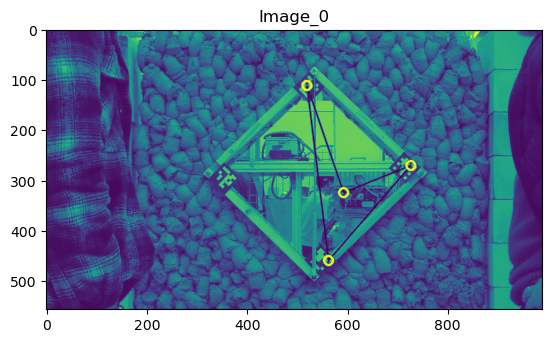

In [171]:
#Corner detection and lines connecting

plt.imshow(img)
plt.title('Image_0')
plt.show()

## 0. Edge Detection mit Canny()

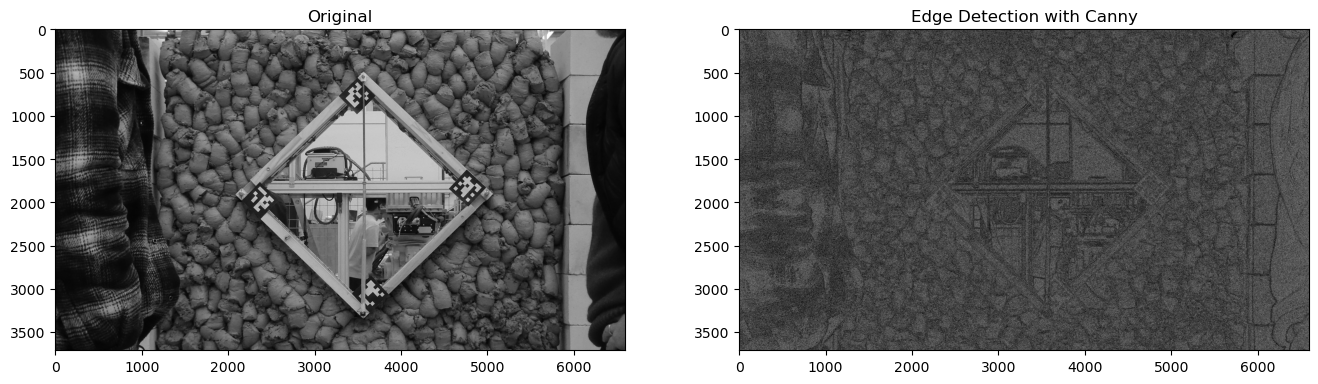

In [221]:
#Try with edge detection


ori_img = cv2.imread('photo/QR1.jpg')
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY )


edges = cv2.Canny(ori_img,
                  threshold1 = 60,
                  threshold2 = 120,
                  apertureSize = 7,
                  L2gradient = True)




#Plottomg hier
plt.figure(figsize=(25,15))


plt.subplot(1,3,1)
plt.imshow(ori_img,cmap = 'gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Detection with Canny')
plt.show()

# plt.subplot(1,3,3)
#laplacian = cv.Laplacian(ori_img, cv.C)
# plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Detection with Leplacian')
# plt.show()


#plt.suptitle('image_0')

#plt.tight_layout()

In [201]:
ori_img.dtype

dtype('uint8')

## 1. Edge Detection mit Laplacian()

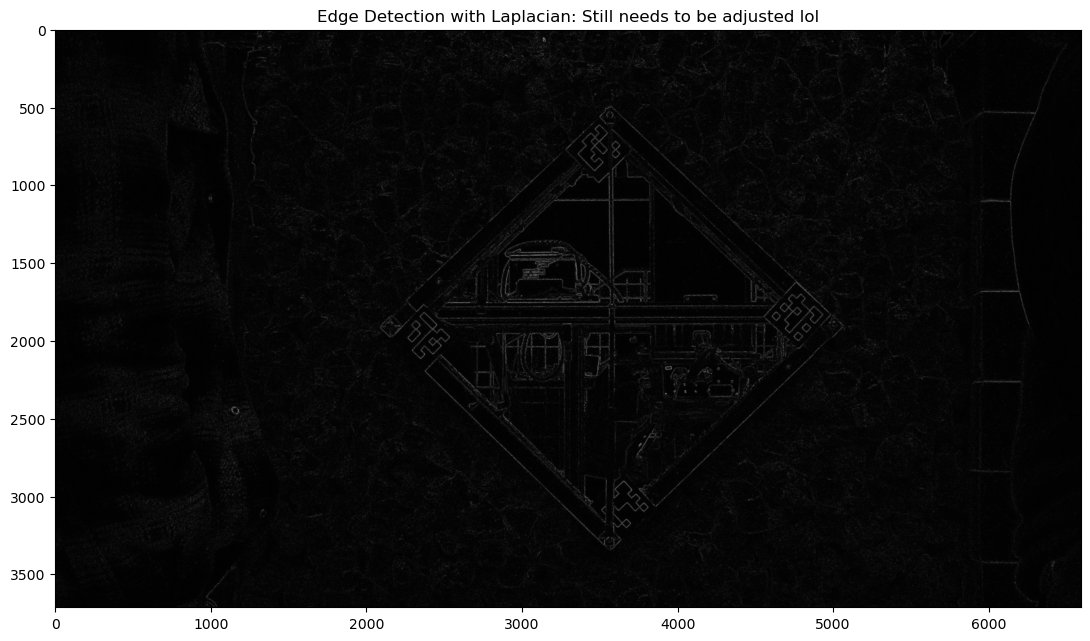

In [220]:
# Remove noise by blurring with a Gaussian filter
ori_img_L = cv2.GaussianBlur(ori_img, (5, 5), -1)

# Apply Laplacian
ori_img_L = cv2.Laplacian(ori_img_L, ddepth = cv2.CV_16S, ksize=3)

# converting back to uint8
ori_img_L = cv2.convertScaleAbs(ori_img_L)


plt.figure(figsize=(15,15/2))
plt.imshow(ori_img_L, cmap = 'gray')
plt.title('Edge Detection with Laplacian: Still needs to be adjusted lol')
plt.axis(True);

## 2. Edge Detection mit QR Code für die Ecke

1. Apply contour detection: cv2.findContours
2. QR code decoding: use `qrtool` or `zbar`

Feature comparison

1. `cv2.BFMatcher`, `cv2.FlannBaseMatcher`
2. `cv2.Findhomography`
3. Image warping